In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv("customer_segmentation.csv",encoding="latin_1")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# we drop the Z_CostContact and Z_Revenue becuse in whic all values same for all rows

In [4]:
df.drop(columns=["Z_CostContact","Z_Revenue"],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Demographic Analysis:

# 1. What is the distribution of customer ages?

In [6]:
current_year=datetime.now().year

In [7]:
current_year

2025

In [8]:
df["Age"]=current_year - df["Year_Birth"]

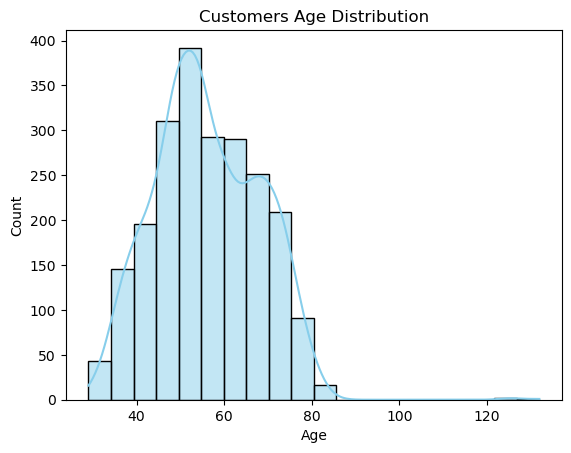

In [9]:
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Customers Age Distribution")
plt.show()

# How does education level vary across customers?

In [10]:
education_level_across_customers=df.groupby("Education")["Dt_Customer"].count().reset_index()
education_level_across_customers

,Education,Dt_Customer
0,2n Cycle,203
1,Basic,54
2,Graduation,1127
3,Master,370
4,PhD,486


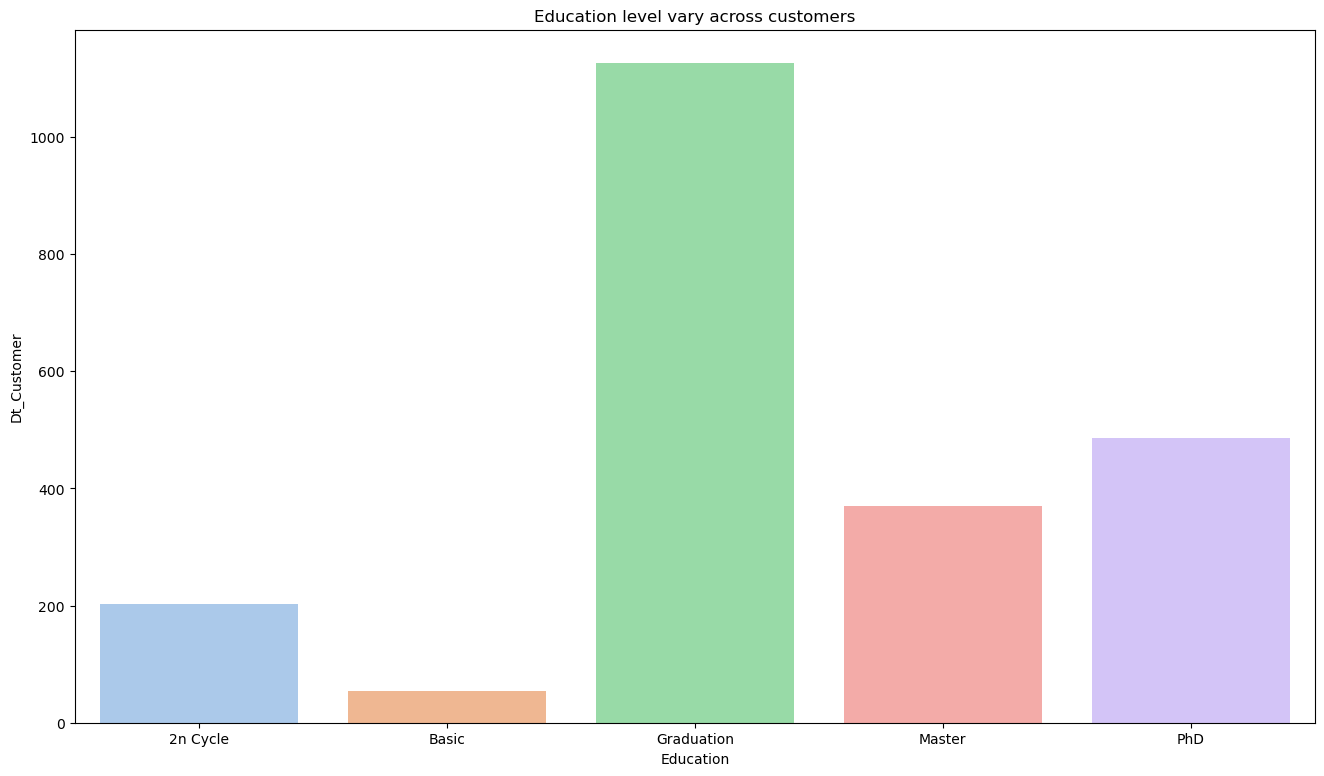

In [11]:
plt.figure(figsize=(16,9))
sns.barplot(data=education_level_across_customers,x="Education",y="Dt_Customer",palette="pastel")
plt.title("Education level vary across customers")
plt.show()

# What is the marital status distribution?

In [12]:
marital_status_dist=df["Marital_Status"].value_counts().reset_index(name="Counts")
marital_status_dist

,Marital_Status,Counts
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


In [13]:
marital_status_dist["Marital_Status"].values

array(['Married', 'Together', 'Single', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
labels=['Married', 'Together', 'Single', 'Divorced', 'Widow', 'Alone','Absurd', 'YOLO']

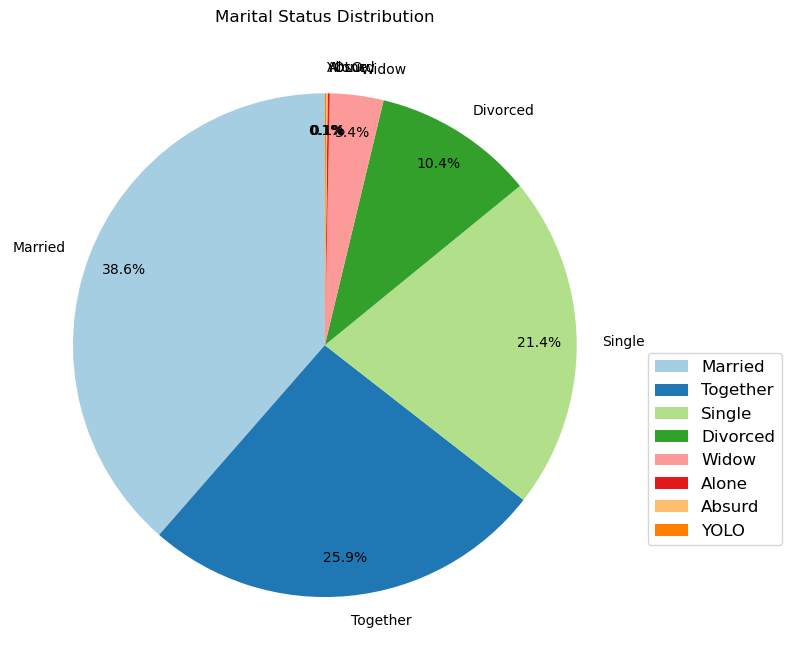

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(marital_status_dist["Counts"], labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=plt.cm.Paired.colors)
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5), fontsize='large')
plt.title("Marital Status Distribution")
plt.tight_layout()
plt.show()

# What is the income distribution of customers?

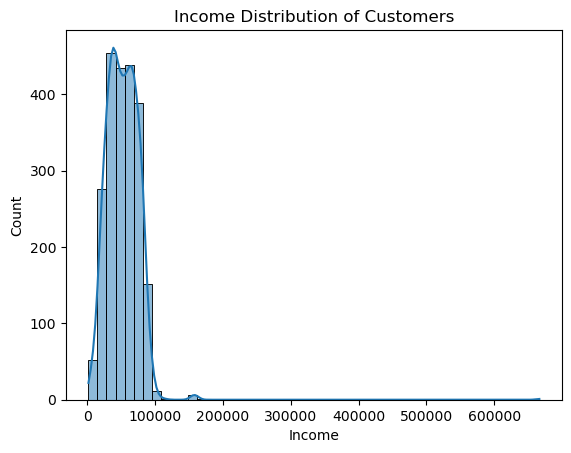

In [16]:
sns.histplot(df["Income"],bins=50,kde=True)
plt.title("Income Distribution of Customers")
plt.show()

# 5. How does income vary by education level?

In [17]:
income_vary_by_edu=df.groupby("Education")["Income"].sum().sort_values(ascending=False).reset_index()
income_vary_by_edu

,Education,Income
0,Graduation,58835937.0
1,PhD,27005896.0
2,Master,19314900.0
3,2n Cycle,9526638.0
4,Basic,1096538.0


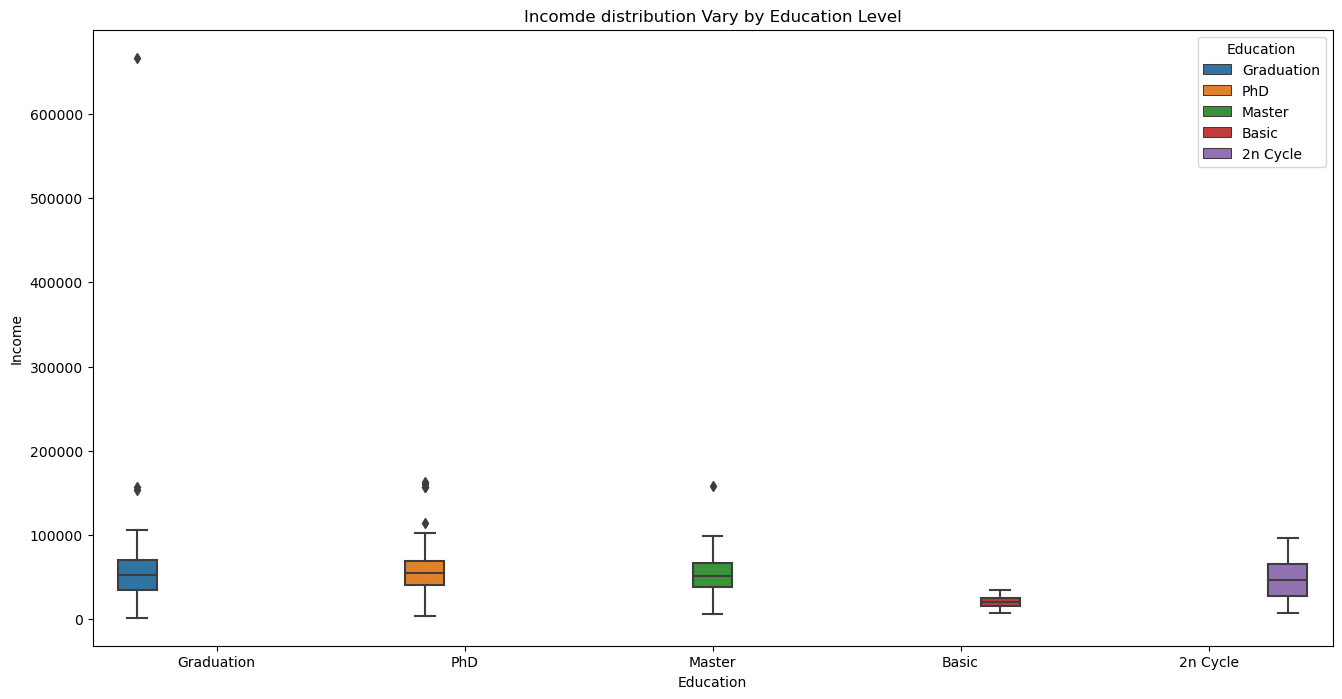

In [18]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df,x="Education",y="Income",hue="Education")
plt.title("Incomde distribution Vary by Education Level")
plt.show()

# Is there a relationship between income and marital status?


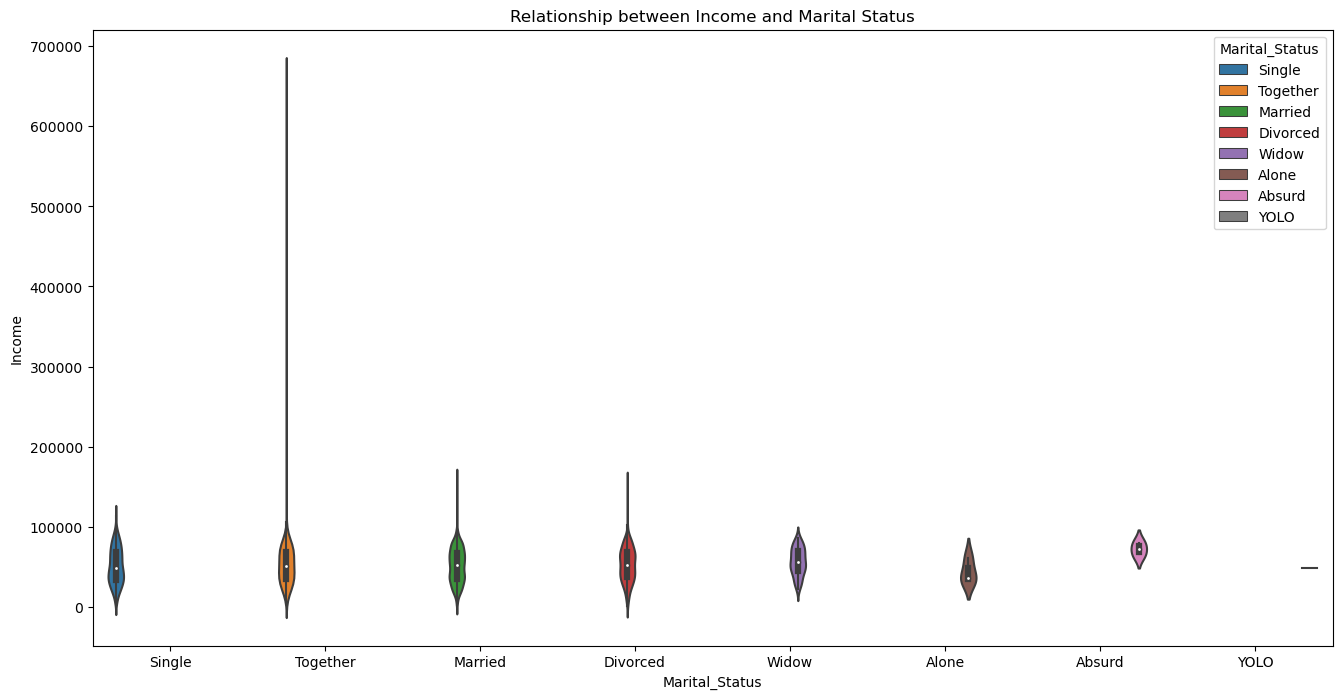

In [19]:
plt.figure(figsize=(16,8))
sns.violinplot(data=df,x="Marital_Status",y="Income",hue="Marital_Status")
plt.title("Relationship between Income and Marital Status")
plt.show()

# How many customers have children at home (Kidhome) and teenagers (Teenhome)?

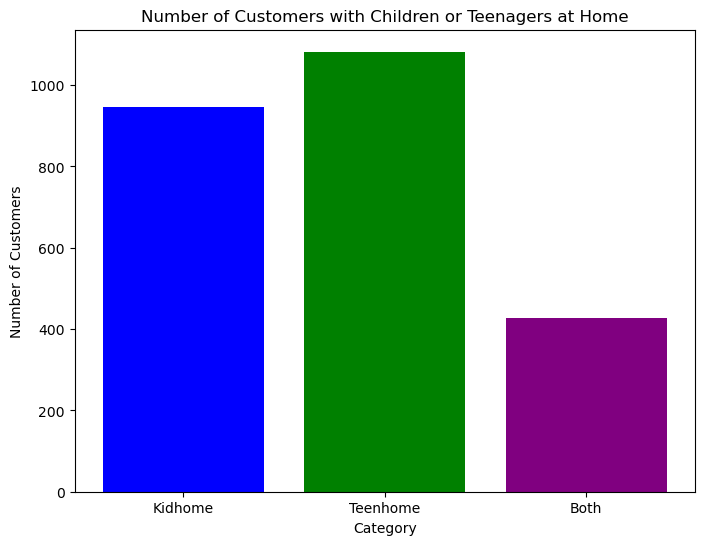

In [20]:
kidhome_count = df[df['Kidhome'] > 0].shape[0]
teenhome_count = df[df['Teenhome'] > 0].shape[0]
both_count = df[(df['Kidhome'] > 0) & (df['Teenhome'] > 0)].shape[0]

categories = ['Kidhome', 'Teenhome', 'Both']
values = [kidhome_count, teenhome_count, both_count]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'green', 'purple'])
plt.title('Number of Customers with Children or Teenagers at Home')
plt.xlabel('Category')
plt.ylabel('Number of Customers')
plt.show()



# What is the distribution of the year of birth of customers?

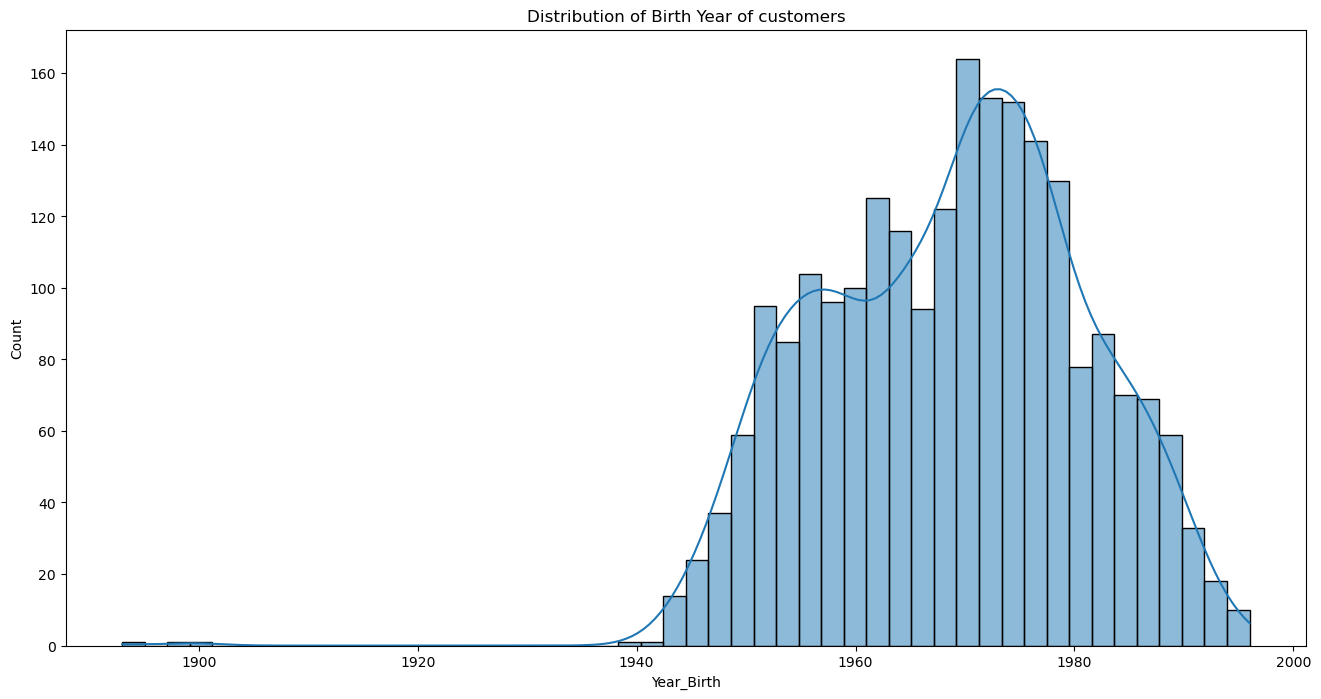

In [21]:
plt.figure(figsize=(16, 8))
sns.histplot(df["Year_Birth"],bins=50,kde=True)
plt.title("Distribution of Birth Year of customers")
plt.show()

# Purchase Behavior:


# What is the total amount spent on wines by customers?

In [52]:
total_wine_spent = df['MntWines'].sum()
print(f"Total amount spent on wines by customers: ${total_wine_spent:.2f}")

Total amount spent on wines by customers: $680816.00


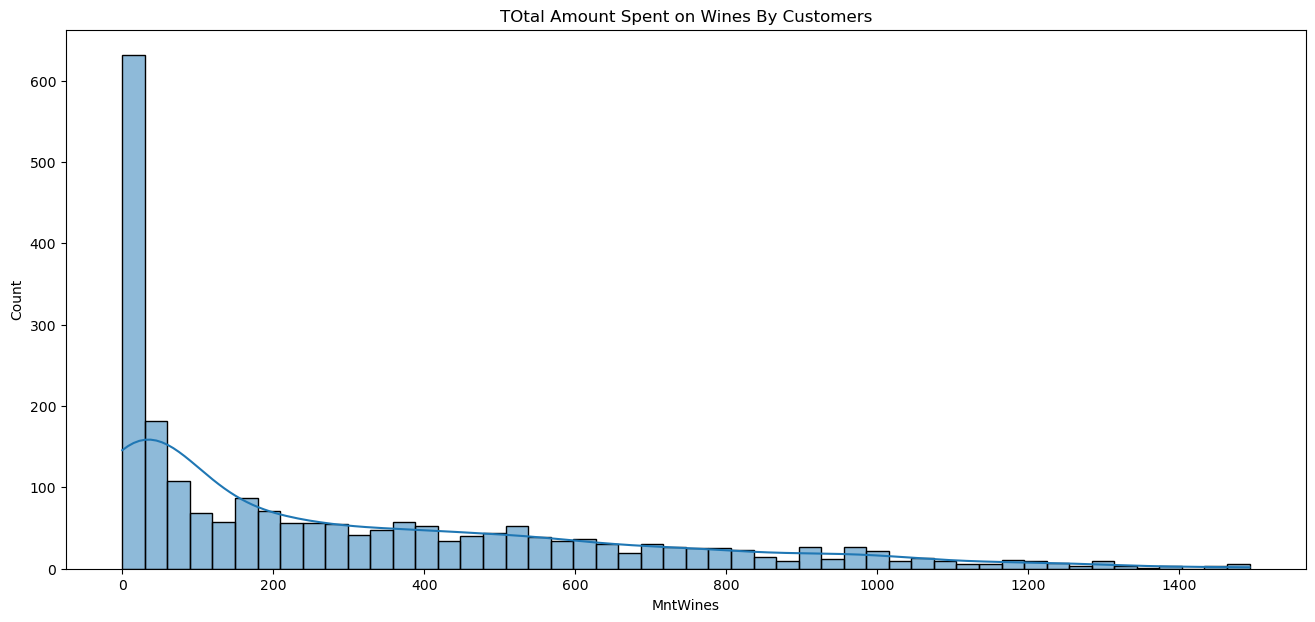

In [22]:
plt.figure(figsize=(16,7))
sns.histplot(df["MntWines"],bins=50,kde=True)
plt.title("TOtal Amount Spent on Wines By Customers")
plt.show()

# How much do customers spend on different product categories (Wines, Fruits, Meat, Fish, Sweets, Gold Products)?

In [23]:
Spending={"Wines":df["MntWines"].sum(),
         "Fruits":df["MntFruits"].sum(),
         "Meat":df["MntMeatProducts"].sum(),
         "Fish":df["MntFishProducts"].sum(),
         "Sweets":df["MntSweetProducts"].sum(),
         "Gold":df["MntGoldProds"].sum(),}

In [24]:
Spending

{'Wines': 680816,
 'Fruits': 58917,
 'Meat': 373968,
 'Fish': 84057,
 'Sweets': 60621,
 'Gold': 98609}

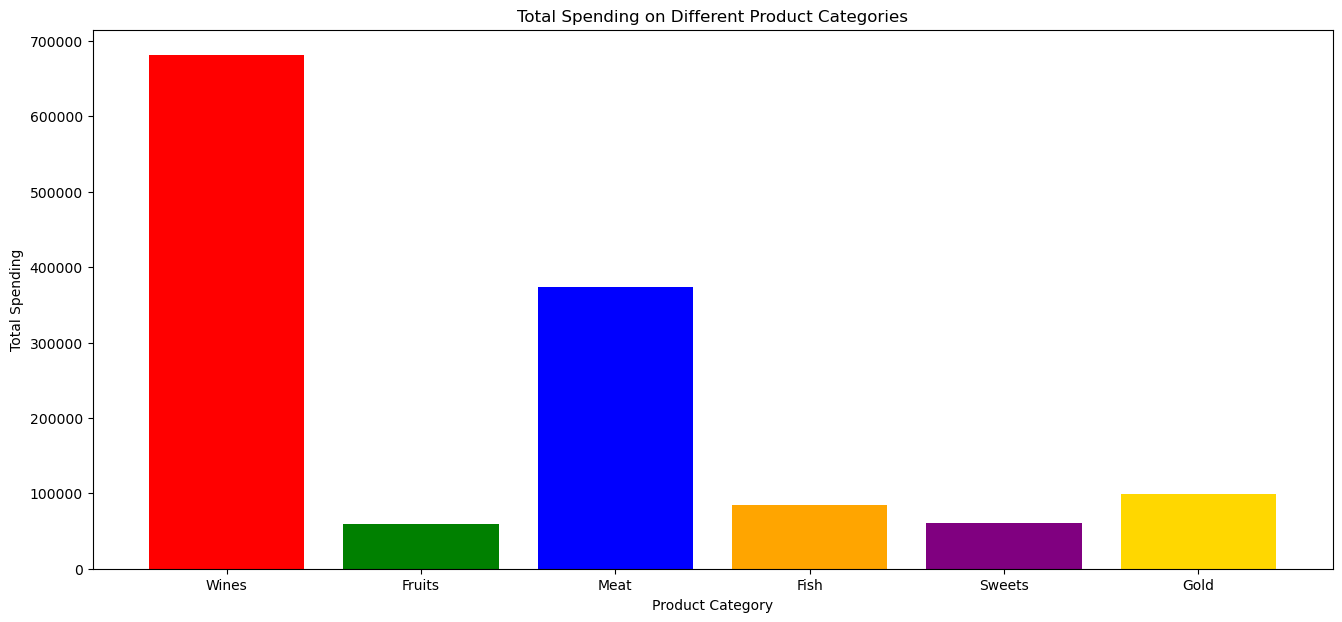

In [25]:
plt.figure(figsize=(16,7))
plt.bar(Spending.keys(), Spending.values(), color=['red', 'green', 'blue', 'orange', 'purple', 'gold'])
plt.title('Total Spending on Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.show()

# Which product category has the highest average spending?

In [26]:
average_spending = {
    'Wines': df['MntWines'].mean(),
    'Fruits': df['MntFruits'].mean(),
    'Meat': df['MntMeatProducts'].mean(),
    'Fish': df['MntFishProducts'].mean(),
    'Sweets': df['MntSweetProducts'].mean(),
    'Gold Products': df['MntGoldProds'].mean()
}


In [55]:
average_spending

{'Wines': 303.9357142857143,
 'Fruits': 26.302232142857143,
 'Meat': 166.95,
 'Fish': 37.52544642857143,
 'Sweets': 27.06294642857143,
 'Gold Products': 44.021875}

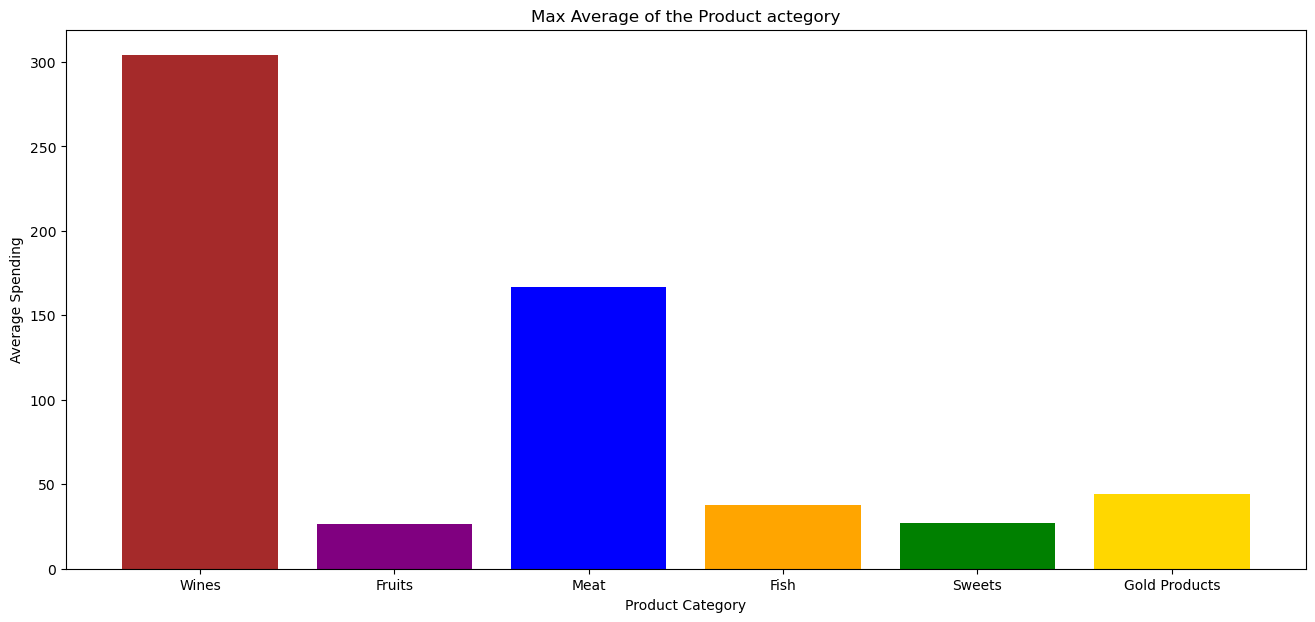

In [27]:
plt.figure(figsize=(16,7))
plt.bar(average_spending.keys(), average_spending.values(), color=['brown', 'purple', 'blue', 'orange', 'green', 'gold'])
plt.title('Max Average of the Product actegory')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.show()

# How does the total amount spent vary by income?


In [28]:
df['TotalAmountSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [29]:
bins = [0, 20000, 40000, 60000, 80000, 100000, df['Income'].max()]
labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '>100k']
df['IncomeGroup'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

income_spent = df.groupby('IncomeGroup')['TotalAmountSpent'].mean().reset_index()

In [30]:
income_spent

,IncomeGroup,TotalAmountSpent
0,<20k,72.685039
1,20k-40k,98.292562
2,40k-60k,401.006231
3,60k-80k,1106.422400
4,80k-100k,1553.117647
5,>100k,893.583333


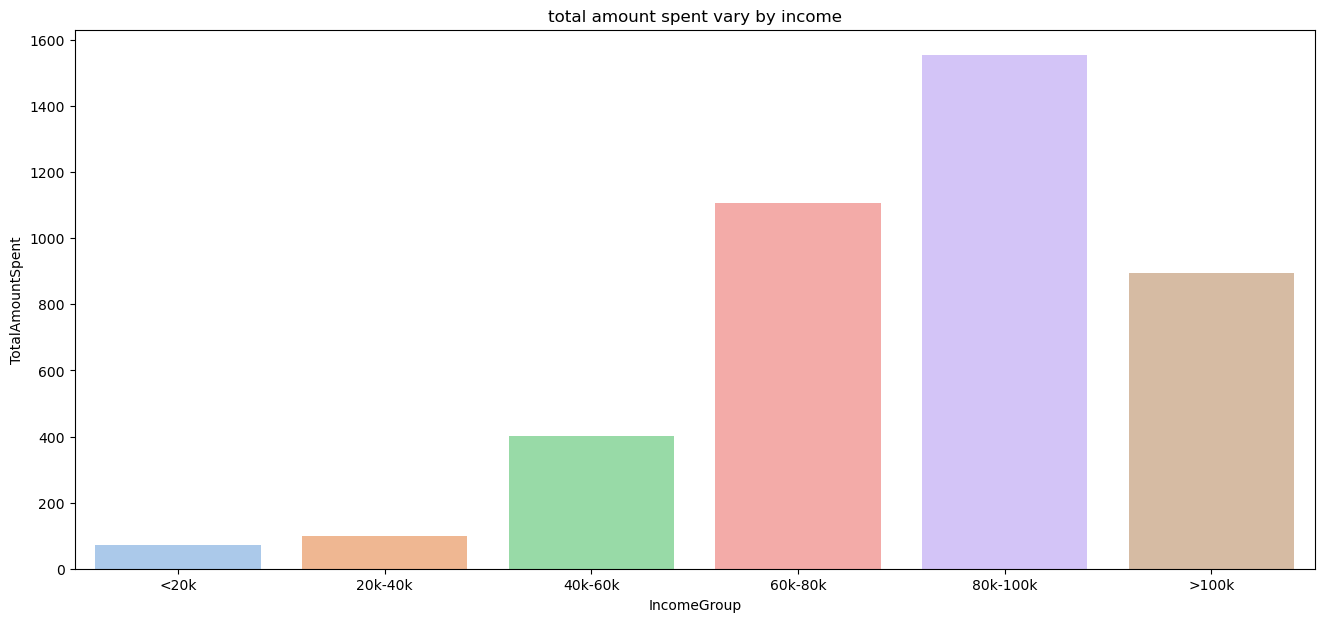

In [31]:
plt.figure(figsize=(16,7))
sns.barplot(data=income_spent,x="IncomeGroup",y="TotalAmountSpent",palette="pastel")
plt.title("total amount spent vary by income")
plt.show()

# What is the distribution of the number of store purchases?


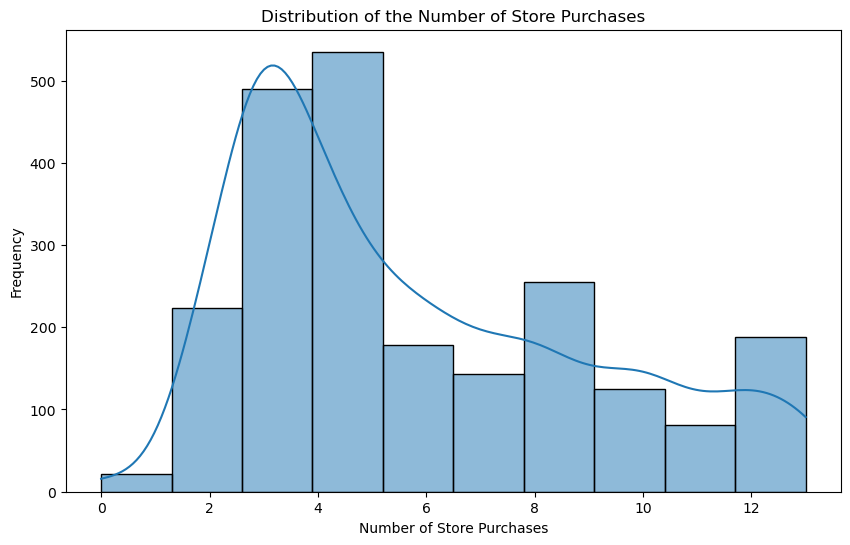

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['NumStorePurchases'], bins=10, kde=True)
plt.title('Distribution of the Number of Store Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Frequency')
plt.show()

# How many purchases are made via different channels (Web, Catalog, Store)?


In [33]:
channels = {
    'Web Purchases': df['NumWebPurchases'].sum(),
    'Catalog Purchases': df['NumCatalogPurchases'].sum(),
    'Store Purchases': df['NumStorePurchases'].sum()
}
channel_purchases = pd.DataFrame(list(channels.items()), columns=['Channel', 'TotalPurchases'])
channel_purchases

,Channel,TotalPurchases
0,Web Purchases,9150
1,Catalog Purchases,5963
2,Store Purchases,12970


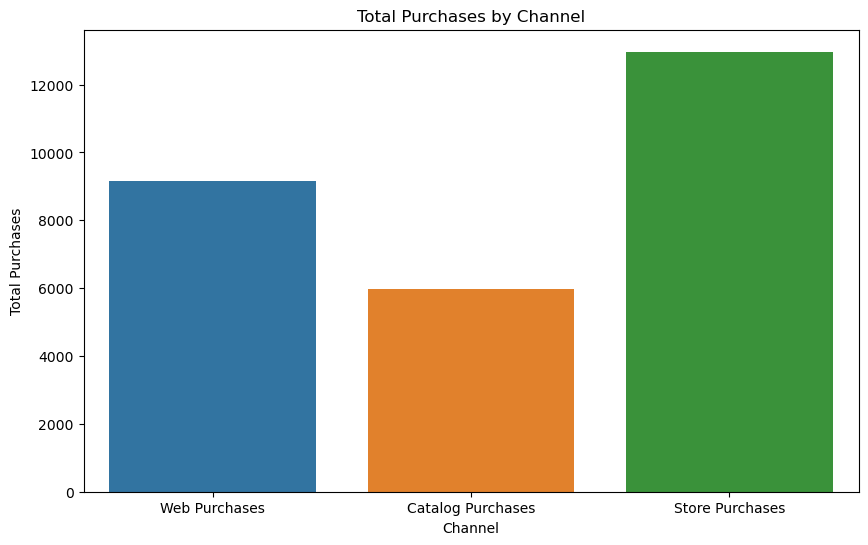

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='TotalPurchases', data=channel_purchases)

plt.title('Total Purchases by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Purchases')
plt.show()

# What is the average recency of purchases?


In [35]:
average_recency = df['Recency'].mean()
average_recency

49.109375

# Temporal Analysis:


#  How has customer behavior (spending, visits) changed over time (based on Dt_Customer )?

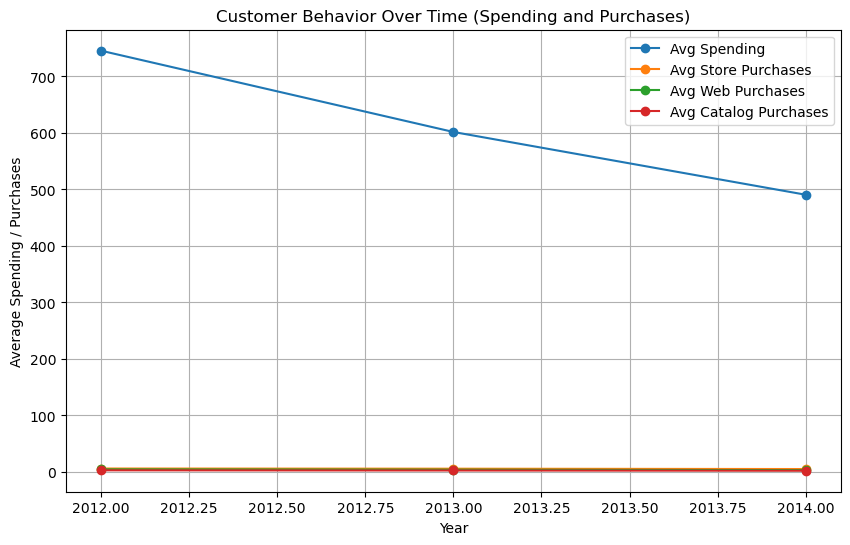

In [56]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.to_period('M')

df['TotalAmountSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

behavior_over_time = df.groupby('Year').agg(
    AvgSpending=('TotalAmountSpent', 'mean'),
    AvgStorePurchases=('NumStorePurchases', 'mean'),
    AvgWebPurchases=('NumWebPurchases', 'mean'),
    AvgCatalogPurchases=('NumCatalogPurchases', 'mean')
).reset_index()

# Plot customer behavior trends over time
plt.figure(figsize=(10, 6))

plt.plot(behavior_over_time['Year'], behavior_over_time['AvgSpending'], label='Avg Spending', marker='o')
plt.plot(behavior_over_time['Year'], behavior_over_time['AvgStorePurchases'], label='Avg Store Purchases', marker='o')
plt.plot(behavior_over_time['Year'], behavior_over_time['AvgWebPurchases'], label='Avg Web Purchases', marker='o')
plt.plot(behavior_over_time['Year'], behavior_over_time['AvgCatalogPurchases'], label='Avg Catalog Purchases', marker='o')

plt.title('Customer Behavior Over Time (Spending and Purchases)')
plt.xlabel('Year')
plt.ylabel('Average Spending / Purchases')
plt.legend()
plt.grid(True)
plt.show()


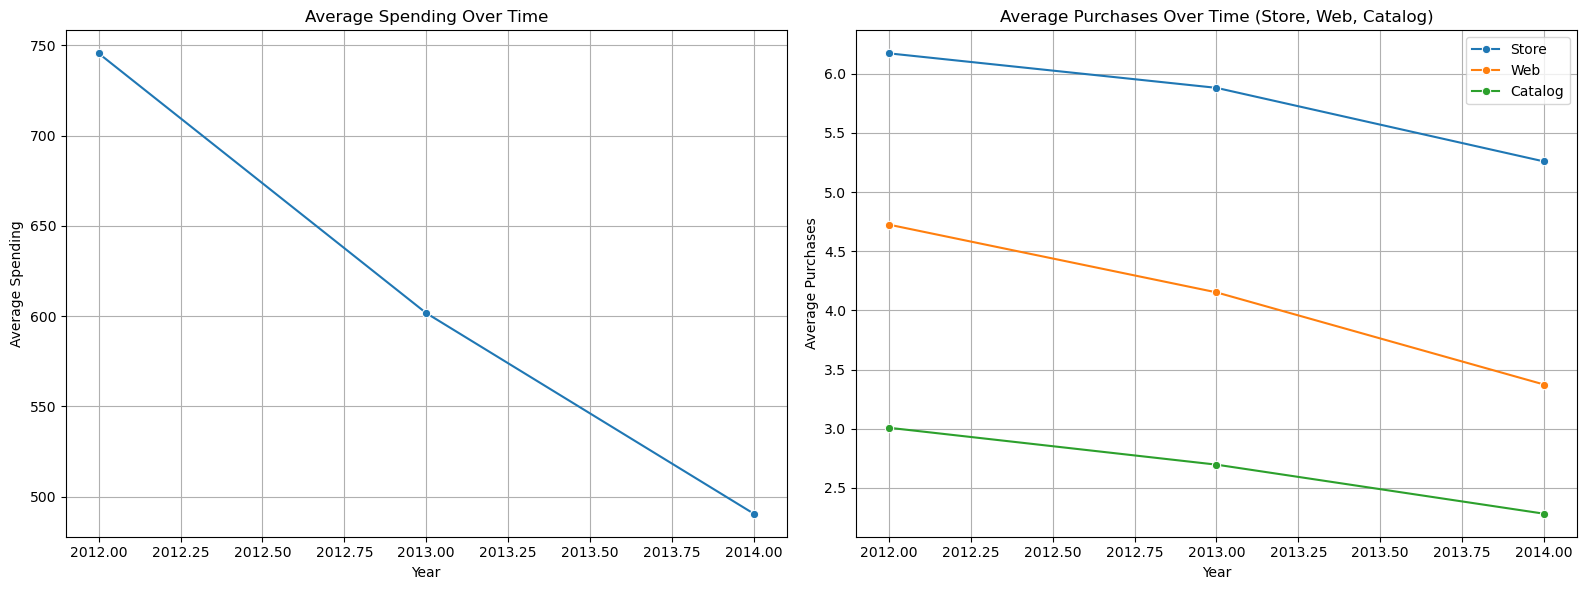

In [37]:


# Calculate total spending (if not already calculated)
df['TotalAmountSpent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Group by year (or month) and calculate the average spending and visits (store, web, catalog)
behavior_over_time = df.groupby('Year').agg(
    AvgSpending=('TotalAmountSpent', 'mean'),
    AvgStorePurchases=('NumStorePurchases', 'mean'),
    AvgWebPurchases=('NumWebPurchases', 'mean'),
    AvgCatalogPurchases=('NumCatalogPurchases', 'mean')
).reset_index()

# Create a 1x2 grid for plots (one row, two columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Average Spending over time
sns.lineplot(x='Year', y='AvgSpending', data=behavior_over_time, ax=axes[0], marker='o')
axes[0].set_title('Average Spending Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Spending')
axes[0].grid(True)

# Plot Average Purchases (Store, Web, Catalog) over time
sns.lineplot(x='Year', y='AvgStorePurchases', data=behavior_over_time, ax=axes[1], label='Store', marker='o')
sns.lineplot(x='Year', y='AvgWebPurchases', data=behavior_over_time, ax=axes[1], label='Web', marker='o')
sns.lineplot(x='Year', y='AvgCatalogPurchases', data=behavior_over_time, ax=axes[1], label='Catalog', marker='o')

axes[1].set_title('Average Purchases Over Time (Store, Web, Catalog)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Purchases')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


# How does the recency of purchases vary by different customer demographics?

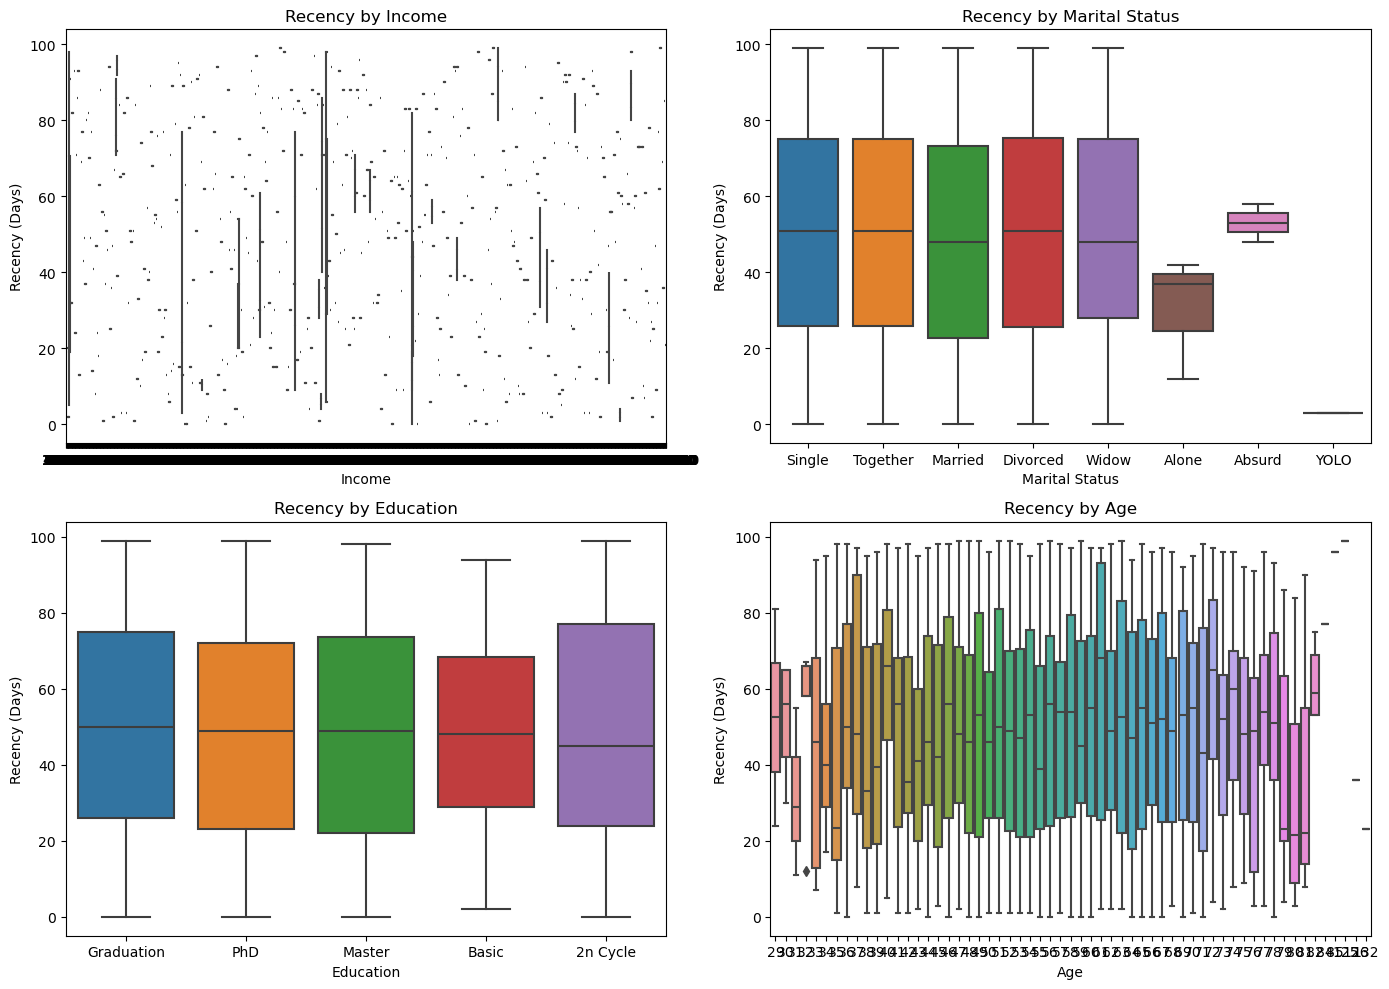

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='Income', y='Recency', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Recency by Income')
axes[0, 0].set_xlabel('Income')
axes[0, 0].set_ylabel('Recency (Days)')

sns.boxplot(x='Marital_Status', y='Recency', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Recency by Marital Status')
axes[0, 1].set_xlabel('Marital Status')
axes[0, 1].set_ylabel('Recency (Days)')

sns.boxplot(x='Education', y='Recency', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Recency by Education')
axes[1, 0].set_xlabel('Education')
axes[1, 0].set_ylabel('Recency (Days)')

sns.boxplot(x='Age', y='Recency', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Recency by Age')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Recency (Days)')

# Adjust layout
plt.tight_layout()
plt.show()

# Are customers who accepted campaigns more likely to have made purchases recently?


In [41]:
df['AcceptedAnyCampaign'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0

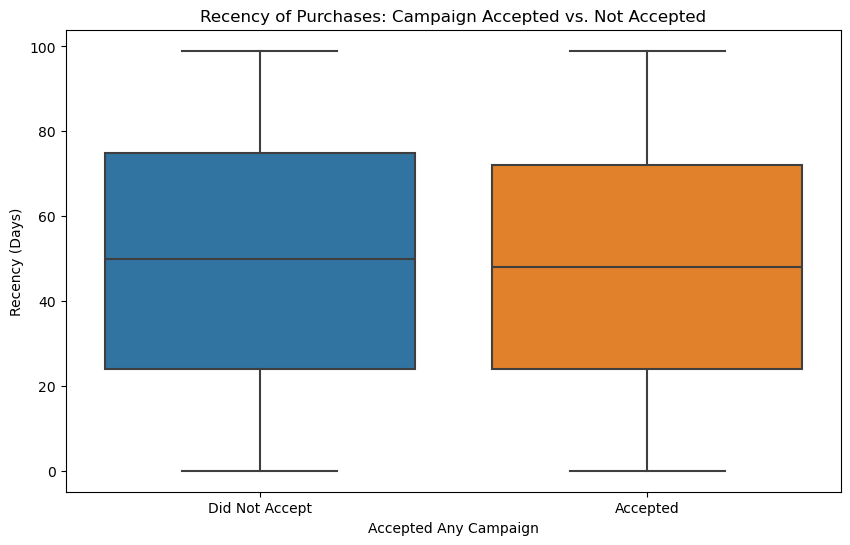

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AcceptedAnyCampaign', y='Recency', data=df)
plt.title('Recency of Purchases: Campaign Accepted vs. Not Accepted')
plt.xlabel('Accepted Any Campaign')
plt.ylabel('Recency (Days)')
plt.xticks([0, 1], ['Did Not Accept', 'Accepted'])

plt.show()

# Miscellaneous:

# What is the correlation between different numerical variables (e.g., Income, Recency,Purchases)?


In [44]:
numerical_columns = ['Income', 'Recency', 'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                     'NumDealsPurchases', 'NumWebVisitsMonth', 'TotalAmountSpent']
correlation_matrix = df[numerical_columns].corr()

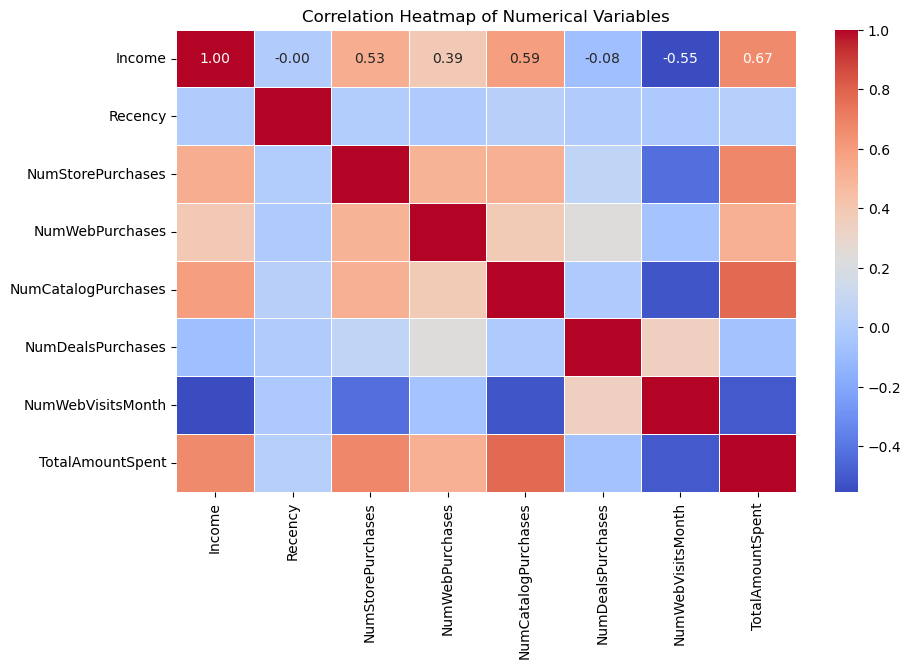

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# How does the number of web purchases relate to total spending?

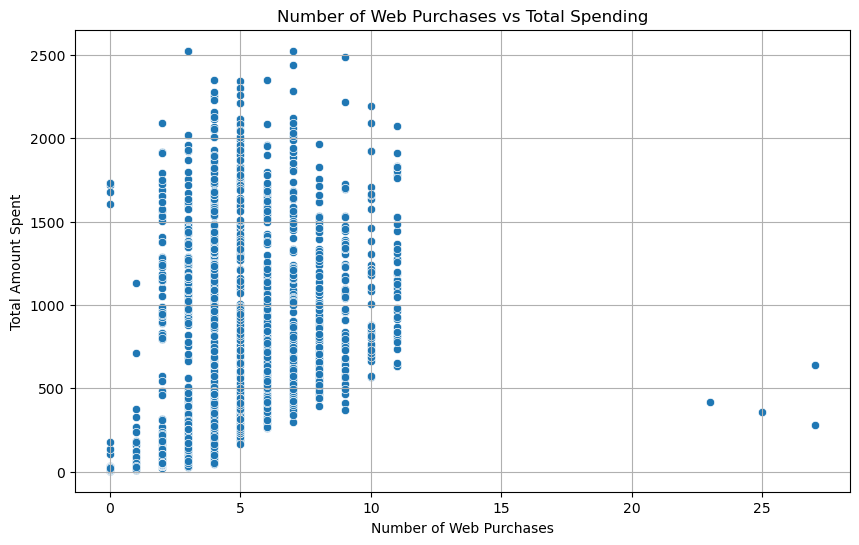

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebPurchases', y='TotalAmountSpent', data=df)

# Customize the plot
plt.title('Number of Web Purchases vs Total Spending')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Total Amount Spent')
plt.grid(True)

plt.show()

In [57]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'TotalAmountSpent',
       'IncomeGroup', 'Year', 'Month', 'AcceptedAnyCampaign'],
      dtype='object')

In [58]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalAmountSpent,IncomeGroup,Year,Month,AcceptedAnyCampaign
335,10151,1960,Graduation,Divorced,62204.0,0,2,2012-09-12,38,317,...,0,0,0,0,65,946,60k-80k,2012,2012-09,False
1980,3032,1984,Graduation,Married,24570.0,1,0,2013-02-27,97,28,...,0,0,0,0,41,193,20k-40k,2013,2013-02,False
545,8541,1990,2n Cycle,Married,24683.0,1,0,2014-03-08,98,8,...,0,0,0,0,35,41,20k-40k,2014,2014-03,False
583,5123,1951,Master,Married,27450.0,0,0,2013-04-15,57,37,...,0,0,0,0,74,143,20k-40k,2013,2013-04,False
2138,2948,1954,Master,Divorced,62637.0,0,1,2014-03-01,76,104,...,0,0,0,0,71,185,60k-80k,2014,2014-03,False
54,9381,1978,Graduation,Married,66373.0,1,1,2013-06-12,57,328,...,0,0,0,0,47,606,60k-80k,2013,2013-06,False
2070,2406,1949,Graduation,Together,54591.0,0,1,2013-08-05,63,376,...,0,0,0,0,76,519,40k-60k,2013,2013-08,False
202,8727,1978,Graduation,Divorced,63693.0,0,1,2013-10-14,63,587,...,0,0,0,0,47,1150,60k-80k,2013,2013-10,False
1200,837,1977,Graduation,Married,54809.0,1,1,2013-09-11,0,63,...,0,0,0,0,48,174,40k-60k,2013,2013-09,False
983,3056,1978,Graduation,Divorced,63693.0,0,1,2013-10-14,63,587,...,0,0,0,0,47,1150,60k-80k,2013,2013-10,False
